# Assignment 5

### The Potential of Reviews Analytics

### Data Preparation & Analysis

### Review Form Fields

### Example of Review Form Filled out

### Data Set File:  CustomerReviews.txt

In [1]:
import os

import cPickle as pickle

import pandas as pd  

import numpy as np  

from pandas import DataFrame, Series


In [2]:
# 1. Open the fiel to read it
f =  open('data/CustomerReviews.txt')

# 2. Read the entire file in one step as a single GIANT string
raw_giant_string_data = f.read()


In [3]:
# Verify the datatype you got?
type(raw_giant_string_data)

str

In [4]:
# 3. Split the GIANT string you read into LIST of lines
raw_list_of_strings_data = raw_giant_string_data.splitlines()

In [5]:
# Verify the datatype you got?
type(raw_list_of_strings_data)

list

In [6]:
# 4. Print the raw_list_data
# How does the data look like in the raw_list_data?
# Every Line will be represented as an item of type (String) in the resulting LIST
raw_list_of_strings_data[:10]

['ProductModelName: Samsung TV 60 LED',
 'ProductCategory: TV',
 'ProductPrice: 1200',
 'RetailerName: Bestbuy',
 'RetailerZipCode: 60585',
 'RetailerCity: Naperville',
 'RetailerState: IL',
 'RetailerOnSale: No',
 'ManufacturerName: Samsung',
 'ManufacturerRebate: No']

In [7]:
# Does the data list you got have similar patterns?
# Did you get a list of strings, where the PATTERN of the string could be either
#  (a) 'parameterName: parameterValue'  
#  (b)  ''     
# Note that      ''        string is the BLANK line in the textfile

In [8]:
# 5. Create  the LOL  - a List Of two-item Lists
# So we can have something like this:
#     [['Product/ModelName', 'Samsung TV 60 LED'],
#      ['Product/Category', 'TV'],
#      ['Product/Price', '1200'], 
#       ........................
#       ........................

In [9]:
# Empty list: The [] characters denote an empty list. 
# Python evaluates zero-element collections to False.
# In our data list, the blank line is represented by Empty List []

raw_list_of_lists_data = []
for row in raw_list_of_strings_data:
    if row :
        raw_list_of_lists_data = raw_list_of_lists_data +  [row.split(': ')]


In [10]:
type (raw_list_of_lists_data)

list

In [11]:
raw_list_of_lists_data[:32]

[['ProductModelName', 'Samsung TV 60 LED'],
 ['ProductCategory', 'TV'],
 ['ProductPrice', '1200'],
 ['RetailerName', 'Bestbuy'],
 ['RetailerZipCode', '60585'],
 ['RetailerCity', 'Naperville'],
 ['RetailerState', 'IL'],
 ['RetailerOnSale', 'No'],
 ['ManufacturerName', 'Samsung'],
 ['ManufacturerRebate', 'No'],
 ['ReviewUserId', 'abc234'],
 ['ReviewRating', '1'],
 ['ReviewDate', '3/14/2013'],
 ['ReviewText', 'Bluetooth did not work for my sound system'],
 ['ProductModelName', 'Surface 3'],
 ['ProductCategory', 'Tablet'],
 ['ProductPrice', '399'],
 ['RetailerName', 'Hhgregg'],
 ['RetailerZipCode', '90012'],
 ['RetailerCity', 'Los Angeles'],
 ['RetailerState', 'CA'],
 ['RetailerOnSale', 'Yes'],
 ['ManufacturerName', 'Microsoft'],
 ['ManufacturerRebate', 'No'],
 ['ReviewUserId', 'chj787'],
 ['ReviewRating', '5'],
 ['ReviewDate', '7/1/2014'],
 ['ReviewText', 'Much better screen than the samsung galaxy tablet'],
 ['ProductModelName', 'Sony TV 42 LED'],
 ['ProductCategory', 'TV'],
 ['ProductPr

In [12]:
# 6. Create a generator Method for our partitions of the reviews in the raw_list_of_lists_data

def partition_generator(reviews_list, n):
    def reviews_partitions():
        for i in xrange(0, len(reviews_list), n):
            yield reviews_list[i:i+n]
    return [i for i in reviews_partitions()]


In [13]:
partitioned_list_of_reviews = partition_generator(raw_list_of_lists_data, 14)


partitioned_list_of_reviews[:32]

[[['ProductModelName', 'Samsung TV 60 LED'],
  ['ProductCategory', 'TV'],
  ['ProductPrice', '1200'],
  ['RetailerName', 'Bestbuy'],
  ['RetailerZipCode', '60585'],
  ['RetailerCity', 'Naperville'],
  ['RetailerState', 'IL'],
  ['RetailerOnSale', 'No'],
  ['ManufacturerName', 'Samsung'],
  ['ManufacturerRebate', 'No'],
  ['ReviewUserId', 'abc234'],
  ['ReviewRating', '1'],
  ['ReviewDate', '3/14/2013'],
  ['ReviewText', 'Bluetooth did not work for my sound system']],
 [['ProductModelName', 'Surface 3'],
  ['ProductCategory', 'Tablet'],
  ['ProductPrice', '399'],
  ['RetailerName', 'Hhgregg'],
  ['RetailerZipCode', '90012'],
  ['RetailerCity', 'Los Angeles'],
  ['RetailerState', 'CA'],
  ['RetailerOnSale', 'Yes'],
  ['ManufacturerName', 'Microsoft'],
  ['ManufacturerRebate', 'No'],
  ['ReviewUserId', 'chj787'],
  ['ReviewRating', '5'],
  ['ReviewDate', '7/1/2014'],
  ['ReviewText', 'Much better screen than the samsung galaxy tablet']],
 [['ProductModelName', 'Sony TV 42 LED'],
  ['Produ

In [14]:
type(partitioned_list_of_reviews)

list

In [15]:
# 7. Create Column Headers
# Read the FIRST  list ONLY in the partitioned_list_of_reviews 
# and extract from it column_headers for our review_table
# All other lists have the SAME header/pattern names

column_headers_for_reviews_table = [[row[0] for row in partitioned_list_of_reviews[0]]]



In [16]:
column_headers_for_reviews_table

[['ProductModelName',
  'ProductCategory',
  'ProductPrice',
  'RetailerName',
  'RetailerZipCode',
  'RetailerCity',
  'RetailerState',
  'RetailerOnSale',
  'ManufacturerName',
  'ManufacturerRebate',
  'ReviewUserId',
  'ReviewRating',
  'ReviewDate',
  'ReviewText']]

In [17]:

# 8. Create a Row  in the table for every review 
# Though remember, every review has the pairs (parameterName, parametValue)
# We already know teh parameter NAmes in the Header we created in teh prior step
# so we will read only the SECOND COLUMN of every list because that is teh value 
# of the parameter

rows_for_reviews_table = [[col[1] for col in row] for row in partitioned_list_of_reviews]



In [18]:
rows_for_reviews_table

[['Samsung TV 60 LED',
  'TV',
  '1200',
  'Bestbuy',
  '60585',
  'Naperville',
  'IL',
  'No',
  'Samsung',
  'No',
  'abc234',
  '1',
  '3/14/2013',
  'Bluetooth did not work for my sound system'],
 ['Surface 3',
  'Tablet',
  '399',
  'Hhgregg',
  '90012',
  'Los Angeles',
  'CA',
  'Yes',
  'Microsoft',
  'No',
  'chj787',
  '5',
  '7/1/2014',
  'Much better screen than the samsung galaxy tablet'],
 ['Sony TV 42 LED',
  'TV',
  '800',
  'Frys',
  '60616',
  'Chicago',
  'IL',
  'No',
  'Sony',
  'No',
  'fdyu323',
  '4',
  '2/1/2013',
  'Sharp screen highly recommended'],
 ['LG 65',
  'TV',
  '2250',
  'Bestbuy',
  '02110',
  'Boston',
  'MA',
  'No',
  'LG',
  'No',
  'spoi7124',
  '5',
  '5/1/2014',
  'Exellent design and you can use the remote control to control the sound system as well'],
 ['Dell XP 15',
  'Laptop',
  '1349',
  'Hhgregg',
  '60616',
  'Chicago',
  'IL',
  'No',
  'Dell',
  'No',
  'hgjhg652',
  '3',
  '1/14/2014',
  'noisy fan'],
 ['HP Pavilion 15.6',
  'Lapto

In [19]:
# 9. Add the Rows and  Columns we created 
# And that will be our hard-work for the Reviews Table

reviews_table = column_headers_for_reviews_table + rows_for_reviews_table

In [20]:
type(reviews_table)

list

In [21]:
reviews_table[:3]

[['ProductModelName',
  'ProductCategory',
  'ProductPrice',
  'RetailerName',
  'RetailerZipCode',
  'RetailerCity',
  'RetailerState',
  'RetailerOnSale',
  'ManufacturerName',
  'ManufacturerRebate',
  'ReviewUserId',
  'ReviewRating',
  'ReviewDate',
  'ReviewText'],
 ['Samsung TV 60 LED',
  'TV',
  '1200',
  'Bestbuy',
  '60585',
  'Naperville',
  'IL',
  'No',
  'Samsung',
  'No',
  'abc234',
  '1',
  '3/14/2013',
  'Bluetooth did not work for my sound system'],
 ['Surface 3',
  'Tablet',
  '399',
  'Hhgregg',
  '90012',
  'Los Angeles',
  'CA',
  'Yes',
  'Microsoft',
  'No',
  'chj787',
  '5',
  '7/1/2014',
  'Much better screen than the samsung galaxy tablet']]

In [22]:
# 10. Write our Reviews Table (Remember it is LOL) into a CSV File

csvOutFile=open('data/CustomerReviews.csv','wt')	# this will be a text file

csvOutFile.write("\n".join(",".join(row) for row in reviews_table))

csvOutFile.close()


In [23]:
#11 Read the CSV file adn load it into DataFrame

custreview100=pd.read_csv('data/CustomerReviews.csv')

In [24]:
type(custreview100)

pandas.core.frame.DataFrame

In [25]:
custreview100.dtypes

ProductModelName      object
ProductCategory       object
ProductPrice           int64
RetailerName          object
RetailerZipCode        int64
RetailerCity          object
RetailerState         object
RetailerOnSale        object
ManufacturerName      object
ManufacturerRebate    object
ReviewUserId          object
ReviewRating           int64
ReviewDate            object
ReviewText            object
dtype: object

In [26]:
custreview100.head()

,ProductModelName,ProductCategory,ProductPrice,RetailerName,RetailerZipCode,RetailerCity,RetailerState,RetailerOnSale,ManufacturerName,ManufacturerRebate,ReviewUserId,ReviewRating,ReviewDate,ReviewText
0,Samsung TV 60 LED,TV,1200,Bestbuy,60585,Naperville,IL,No,Samsung,No,abc234,1,3/14/2013,Bluetooth did not work for my sound system
1,Surface 3,Tablet,399,Hhgregg,90012,Los Angeles,CA,Yes,Microsoft,No,chj787,5,7/1/2014,Much better screen than the samsung galaxy tablet
2,Sony TV 42 LED,TV,800,Frys,60616,Chicago,IL,No,Sony,No,fdyu323,4,2/1/2013,Sharp screen highly recommended
3,LG 65,TV,2250,Bestbuy,2110,Boston,MA,No,LG,No,spoi7124,5,5/1/2014,Exellent design and you can use the remote con...
4,Dell XP 15,Laptop,1349,Hhgregg,60616,Chicago,IL,No,Dell,No,hgjhg652,3,1/14/2014,noisy fan


# +++++++++++++++++++++++++++++++++++++++++++

# +++++++++++++++++++++++++++++++++++++++++++

# +++++  Now lets execute different queries for our analysis  ++++++

# +++++++++++++++++++++++++++++++++++++++++++

# +++++++++++++++++++++++++++++++++++++++++++

## Query 1: Print the list of all retailers along with the products and the rating

In [27]:
custreview100[['ProductModelName', 'RetailerName', 'ReviewRating']].head()

,ProductModelName,RetailerName,ReviewRating
0,Samsung TV 60 LED,Bestbuy,1
1,Surface 3,Hhgregg,5
2,Sony TV 42 LED,Frys,4
3,LG 65,Bestbuy,5
4,Dell XP 15,Hhgregg,3


## Query 2: Print a list  of reviews where rating greater than 3 - TWO WAYS TO DO IT - SEE BELOW

In [28]:
df4 = custreview100[custreview100['ReviewRating'] > 3]

In [29]:
df4[['ProductModelName', 'RetailerName', 'ReviewRating']].head()

,ProductModelName,RetailerName,ReviewRating
1,Surface 3,Hhgregg,5
2,Sony TV 42 LED,Frys,4
3,LG 65,Bestbuy,5
6,Samsung TV 65 Curved,Bestbuy,5
7,HP Pavilion 15.6,Hhgregg,5


In [30]:
custreview100[custreview100['ReviewRating'] > 3][['ProductModelName', 'RetailerName', 'ReviewRating']].head()

,ProductModelName,RetailerName,ReviewRating
1,Surface 3,Hhgregg,5
2,Sony TV 42 LED,Frys,4
3,LG 65,Bestbuy,5
6,Samsung TV 65 Curved,Bestbuy,5
7,HP Pavilion 15.6,Hhgregg,5


# Query 3: Get a list of products that got review rating 5 and price more than thousand

In [31]:
custreview100[(custreview100['ReviewRating'] == 5) & (custreview100['ProductPrice'] > 1000)].head()

,ProductModelName,ProductCategory,ProductPrice,RetailerName,RetailerZipCode,RetailerCity,RetailerState,RetailerOnSale,ManufacturerName,ManufacturerRebate,ReviewUserId,ReviewRating,ReviewDate,ReviewText
3,LG 65,TV,2250,Bestbuy,2110,Boston,MA,No,LG,No,spoi7124,5,5/1/2014,Exellent design and you can use the remote con...
6,Samsung TV 65 Curved,TV,2199,Bestbuy,94102,San Francisco,CA,No,Samsung,No,vwil639,5,8/21/2014,Perfect for watching basketball game
11,Samsung TV 65 Curved,TV,2199,Bestbuy,2108,Boston,MA,No,Samsung,No,tfdr278,5,5/24/2014,Amazing screen and HD pictures on this TV
29,Dell XP 13,Laptop,1150,Walmart,94158,San Francisco,CA,Yes,Dell,No,jak7810,5,3/10/2015,perfect for work and surfing the internet. Sha...
31,Samsung TV 65 Curved,TV,1899,Hhgregg,30134,Atlanta,GA,Yes,Samsung,Yes,fitn4937,5,5/23/2014,Excellent remote control design


In [32]:
custreview100.head()

,ProductModelName,ProductCategory,ProductPrice,RetailerName,RetailerZipCode,RetailerCity,RetailerState,RetailerOnSale,ManufacturerName,ManufacturerRebate,ReviewUserId,ReviewRating,ReviewDate,ReviewText
0,Samsung TV 60 LED,TV,1200,Bestbuy,60585,Naperville,IL,No,Samsung,No,abc234,1,3/14/2013,Bluetooth did not work for my sound system
1,Surface 3,Tablet,399,Hhgregg,90012,Los Angeles,CA,Yes,Microsoft,No,chj787,5,7/1/2014,Much better screen than the samsung galaxy tablet
2,Sony TV 42 LED,TV,800,Frys,60616,Chicago,IL,No,Sony,No,fdyu323,4,2/1/2013,Sharp screen highly recommended
3,LG 65,TV,2250,Bestbuy,2110,Boston,MA,No,LG,No,spoi7124,5,5/1/2014,Exellent design and you can use the remote con...
4,Dell XP 15,Laptop,1349,Hhgregg,60616,Chicago,IL,No,Dell,No,hgjhg652,3,1/14/2014,noisy fan


# Query 4: How many products reviewed for every retailer?

In [33]:
custreview100.RetailerName.value_counts()

Walmart    26
Target     25
Hhgregg    20
Bestbuy    19
Frys       10
Name: RetailerName, dtype: int64

# Query 5: How many reviews for every product?

In [34]:
custreview100.ProductModelName.value_counts()

Samsung TV 65 Curved    15
HTC One                 13
Dell XP 13              12
Surface 3               10
Lenevo Y50               7
Galaxy S4                6
Samsung Galaxy Tab 4     6
iPhone 6                 6
iPad Air                 6
HP Pavilion 15.6         4
LG 65                    3
Samsung TV 60 LED        3
Sony TV 42 LED           3
Dell XP 15               3
HP Pavilion 15.6         3
Name: ProductModelName, dtype: int64

# Query 6: How many reviews for every product category?

In [35]:
custreview100.ProductCategory .value_counts()

Laptop         29
Smart Phone    25
TV             24
Tablet         21
Walmart         1
Name: ProductCategory, dtype: int64

# Query 7: Get the list of reviews for shoppers in Chicago

In [36]:
ChicagoShoppers=custreview100[custreview100.RetailerCity=='Chicago']

In [37]:
ChicagoShoppers.head()

,ProductModelName,ProductCategory,ProductPrice,RetailerName,RetailerZipCode,RetailerCity,RetailerState,RetailerOnSale,ManufacturerName,ManufacturerRebate,ReviewUserId,ReviewRating,ReviewDate,ReviewText
2,Sony TV 42 LED,TV,800,Frys,60616,Chicago,IL,No,Sony,No,fdyu323,4,2/1/2013,Sharp screen highly recommended
4,Dell XP 15,Laptop,1349,Hhgregg,60616,Chicago,IL,No,Dell,No,hgjhg652,3,1/14/2014,noisy fan
5,HP Pavilion 15.6,Laptop,1399,Hhgregg,60603,Chicago,IL,Yes,HP,Yes,lkju763,2,1/15/2012,Bad monitor
9,Dell XP 13,Laptop,1349,Walmart,60616,Chicago,IL,No,Dell,No,wywe5432,1,10/14/2014,screen goes blank when I start my HD games and...
21,Dell XP 13,Laptop,1200,Walmart,60616,Chicago,IL,No,Dell,No,dur565,3,8/17/2014,sound is not of a good quality


# Query 8: Set the index of the ChicagoShoopers to be RetailerName

In [38]:
ChicagoShoppers=ChicagoShoppers.set_index('RetailerName')

In [39]:
ChicagoShoppers.head()

,ProductModelName,ProductCategory,ProductPrice,RetailerZipCode,RetailerCity,RetailerState,RetailerOnSale,ManufacturerName,ManufacturerRebate,ReviewUserId,ReviewRating,ReviewDate,ReviewText
RetailerName,,,,,,,,,,,,,
Frys,Sony TV 42 LED,TV,800,60616,Chicago,IL,No,Sony,No,fdyu323,4,2/1/2013,Sharp screen highly recommended
Hhgregg,Dell XP 15,Laptop,1349,60616,Chicago,IL,No,Dell,No,hgjhg652,3,1/14/2014,noisy fan
Hhgregg,HP Pavilion 15.6,Laptop,1399,60603,Chicago,IL,Yes,HP,Yes,lkju763,2,1/15/2012,Bad monitor
Walmart,Dell XP 13,Laptop,1349,60616,Chicago,IL,No,Dell,No,wywe5432,1,10/14/2014,screen goes blank when I start my HD games and...
Walmart,Dell XP 13,Laptop,1200,60616,Chicago,IL,No,Dell,No,dur565,3,8/17/2014,sound is not of a good quality


# Query 9: Sort the dataframe based on the row-label index -- that is the retailer name

In [40]:
ChicagoShoppers=ChicagoShoppers.sort_index()

In [41]:
ChicagoShoppers

,ProductModelName,ProductCategory,ProductPrice,RetailerZipCode,RetailerCity,RetailerState,RetailerOnSale,ManufacturerName,ManufacturerRebate,ReviewUserId,ReviewRating,ReviewDate,ReviewText
RetailerName,,,,,,,,,,,,,
Bestbuy,Dell XP 13,Laptop,1349,60616,Chicago,IL,No,Dell,No,kwsf371,4,10/14/2014,Power cable is hort
Bestbuy,Dell XP 13,Laptop,1349,60616,Chicago,IL,No,Dell,No,jlae387,3,12/27/2014,Mouse pad is slow
Frys,Sony TV 42 LED,TV,800,60616,Chicago,IL,No,Sony,No,fdyu323,4,2/1/2013,Sharp screen highly recommended
Frys,Sony TV 42 LED,TV,800,60616,Chicago,IL,Yes,Sony,Yes,nnft387,1,2/1/2013,My HDMI cable did not work for this TV
Hhgregg,Dell XP 15,Laptop,1349,60616,Chicago,IL,No,Dell,No,hgjhg652,3,1/14/2014,noisy fan
Hhgregg,HP Pavilion 15.6,Laptop,1399,60603,Chicago,IL,Yes,HP,Yes,lkju763,2,1/15/2012,Bad monitor
Hhgregg,HP Pavilion 15.6,Laptop,1599,60603,Chicago,IL,Yes,HP,NO,jwop026,5,12/15/2013,Exellent for gaming
Hhgregg,Dell XP 15,Laptop,1499,60616,Chicago,IL,Yes,Dell,No,bvgt421,1,12/14/2014,Screen freezes when I start HD games on it
Hhgregg,HP Pavilion 15.6,Laptop,1899,60603,Chicago,IL,Yes,HP,Yes,mhty430,2,2/15/2015,Mouse pad is really slow


In [42]:
ChicagoShoppers.head(2)

,ProductModelName,ProductCategory,ProductPrice,RetailerZipCode,RetailerCity,RetailerState,RetailerOnSale,ManufacturerName,ManufacturerRebate,ReviewUserId,ReviewRating,ReviewDate,ReviewText
RetailerName,,,,,,,,,,,,,
Bestbuy,Dell XP 13,Laptop,1349,60616,Chicago,IL,No,Dell,No,kwsf371,4,10/14/2014,Power cable is hort
Bestbuy,Dell XP 13,Laptop,1349,60616,Chicago,IL,No,Dell,No,jlae387,3,12/27/2014,Mouse pad is slow


In [43]:
type(ChicagoShoppers['ProductPrice'])

pandas.core.series.Series

In [44]:
thingy = ChicagoShoppers.ProductPrice.sort_index()
thingy

RetailerName
Bestbuy    1349
Bestbuy    1349
Frys        800
Frys        800
Hhgregg    1349
Hhgregg    1399
Hhgregg    1599
Hhgregg    1499
Hhgregg    1899
Target      799
Target     1899
Walmart    1349
Walmart    1200
Walmart     999
Walmart    1200
Name: ProductPrice, dtype: int64

# Query 10: Sorting based on column values using order field. It returns a series

In [45]:
ChicagoShoppers.ProductPrice.order(ascending=False)

AttributeError: 'Series' object has no attribute 'order'

In [ ]:
ChicagoShoppers

# Query 11: Sort Column values using sort_index method to return a Dataframe rather than Series

In [ ]:
ChicagoShoppersSortedPrice=ChicagoShoppers.sort_index(ascending=False, by=['ProductPrice'])

In [ ]:
ChicagoShoppersSortedPrice

# Query 12: Sort based on two column values. We are sorting based on product prices then based on manufacturer name

In [ ]:
ChicagoShoppersSortedPriceAndManufacturer=ChicagoShoppers.sort_index(ascending=[False, True], 
                                                                     by=['ProductPrice', 'ManufacturerName'])

In [ ]:
ChicagoShoppersSortedPriceAndManufacturer

In [ ]:
Top10LikedItemsInChicago=ChicagoShoppers.set_index('ProductModelName')
Top10LikedItemsInChicago.head()

# Query 13: Get the top 10 list of items liked in Chicago

In [ ]:
Top10LikedItemsInChicago=Top10LikedItemsInChicago.ReviewRating.order(ascending=False)[:10]

In [ ]:
Top10LikedItemsInChicago

# Query 14: groupby returns a group of dataframe objects indexed based on akey you specify more or less dictionary-like 

In [ ]:
ItemsReviewedByCity=custreview100.groupby('RetailerCity')

In [ ]:
type(ItemsReviewedByCity)

In [ ]:
for key, group in ItemsReviewedByCity:
    print key
    print group

# Query 15: Find highest price product reviewed/sold in every city

In [ ]:
#generator comprehension for retrieving highest product sold by city
gl = (group.sort_index(by='ProductPrice', ascending=False)[:1] for rtc, group in ItemsReviewedByCity )

In [ ]:
gl

In [ ]:
topProductsByCity = pd.DataFrame()

In [ ]:
for line in gl:
    topProductsByCity = topProductsByCity.append(line)

In [ ]:
topProductsByCity

# Query 16: Plot median product prices per city

In [ ]:
ItemsReviewedByCity['ProductPrice'].median().plot()

# Query 17: Get the top 5 list of liked products for every city

In [ ]:
#generator  for retrieving top 5 products liked by city
gTopRating5 = (group.sort_index(by='ReviewRating', ascending=False)[:5] for rtc, group in ItemsReviewedByCity )

In [ ]:
topLikedProductsByCity = pd.DataFrame()

In [ ]:
for line in gTopRating5 :
    topLikedProductsByCity = topLikedProductsByCity.append(line)

In [ ]:
topLikedProductsByCity

# Query 18: Get top 5 list of most liked and expensive products sorted by retailer name for every city

In [ ]:
#generator  for retrieving top 5 products most expensive and liked by city
gTop5LikedExpensive = (group.sort_index(ascending=[False, False, True], 
                                        by=['ReviewRating', 'ProductPrice', 'RetailerName'])[:5] 
                       for rtc, group in ItemsReviewedByCity )

In [ ]:
top5LikedExpensiveProductsByCity = pd.DataFrame()

In [ ]:
for line in gTop5LikedExpensive :
    top5LikedExpensiveProductsByCity = top5LikedExpensiveProductsByCity.append(line)

In [ ]:
top5LikedExpensiveProductsByCity[['RetailerCity', 'RetailerName', 'ProductModelName', 'ProductPrice', 'ReviewRating']]

# +++++++++++++++++++++++++++++++++++++++++++

# +++++++++++++++++++++++++++++++++++++++++++

# Write Python code for the following requirements (ONE-CELL-FOR-EVERY-REQUIREMENT):

# +++++++++++++++++++++++++++++++++++++++++++

# +++++++++++++++++++++++++++++++++++++++++++

# Requirement #1:

In [ ]:
#First, we create a generator  for retrieving top 5 products disliked by city
gTop5DisikedProducts = (group.sort_index(ascending=[True, True], by=['ReviewRating', 'RetailerName'])[:5] for rtc, group in ItemsReviewedByCity)

# Next, we create a dataframe to return the values of the generation into
topDislikedProductsByCity = pd.DataFrame()

# We iterate through the generator, placing each item into the new dataframe
for item in gTop5DisikedProducts :
    topDislikedProductsByCity = topDislikedProductsByCity.append(item)
    
# Finally, we show the subset - of the most Disliked products sorted by retailer name for every city
topDislikedProductsByCity[['RetailerCity', 'RetailerName', 'ProductModelName', 'ProductPrice', 'ReviewRating']]

# Requirement #2:

In [ ]:
#First, we create a generator  for retrieving top 5 products that are the cheapest by city
gTop5CheapestProducts = (group.sort_index(ascending=[True, True], by=['ProductPrice', 'RetailerName'])[:5] for rtc, group in ItemsReviewedByCity)

# Next, we create a dataframe to return the values of the generation into
topCheapestProductsByCity = pd.DataFrame()

# We iterate through the generator, placing each item into the new dataframe
for item in gTop5CheapestProducts :
    topCheapestProductsByCity = topCheapestProductsByCity.append(item)
    
# Finally, we show the subset - of the cheapest products sorted by retailer name for every city
topCheapestProductsByCity[['RetailerCity', 'RetailerName', 'ProductModelName', 'ProductPrice', 'ReviewRating']]

# Requirement #3:

In [ ]:
# First, we get the products with Rating of 5
productRating5 = custreview100[(custreview100['ReviewRating'] == 5)]
        
# Then, we group those products by city
groupProductRating5ByCity = productRating5.groupby('RetailerCity')

# Finally, we determine the size (total number of products) in each city
ItemsRating5ByCity.size().sort_values(ascending=False)

# Requirement #4:

In [ ]:
# First, we get the products with Rating of 5
productRating5 = custreview100[(custreview100['ReviewRating'] == 5)]
#productRating5

# Then, we group those products by zipcode
groupRating5ByZipcode = productRating5.groupby('RetailerZipCode')

# Next, we determine which group had the highest number of products
highestProductNumberRating5 = groupRating5ByZipcode.size().sort_values(ascending=False)

# And finally, we determine which two zipcodes have the highest number of products
highestProductNumberRating5.head(2)


# Requirement #5:

In [ ]:
# First, we determine all products that were most liked (rating > 2)
mostLikedProducts = custreview100[custreview100['ReviewRating'] > 2]

#mostLikedProducts

# Next, we group those products by City sorted by product names
mostLikeProductsByCityGroup = mostLikedProducts.sort_index(ascending=[False], by=['ProductModelName']).groupby('RetailerCity')

# Then, we determine the number of products in each city group
mostLikeProductsByCity = mostLikeProductsByCityGroup.size().sort_values(ascending=False)

# And finally, we determine which of these cities had the most liked
mostLikeProductsByCity.head(1)

# Bonus Requirement (20% bonus/extra points for Assignment #5):

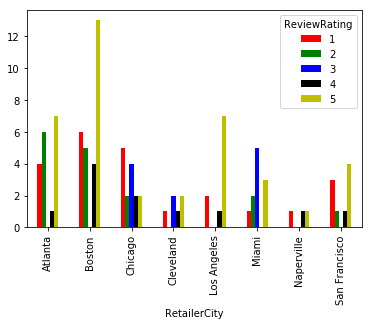

In [46]:
# First, we specify to the matplot library to create plots inline
%matplotlib inline

# Next, we assign some colors for each of the review rating values; for easier identification
rating_colors = 'rgbkymc'  #red, green, blue, black, etc.

# Then, we assemble a cross tabulation of the Retailer Cities versus the Review-Ratings in each
stacked_bar_chart = pd.crosstab(custreview100['RetailerCity'], custreview100['ReviewRating'])

# And finally, we plot an unstacked barchat representing the Review Ratings in each Retailer City
stacked_bar_chart.plot(kind='bar', stacked=False, color=rating_colors, grid=False)

![title](CityGroupRatingCounts-StackedBarChart.PNG)